In [52]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import requests
import json 
from itertools import islice
from bs4 import BeautifulSoup
from time import sleep
import sys
import subprocess  

In [53]:
df = pd.read_csv('./DisasterDeclarationsSummaries.csv')
df.head(2)

,disasterNumber,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,state,declarationDate,fyDeclared,disasterType,incidentType,title,incidentBeginDate,incidentEndDate,disasterCloseOutDate,declaredCountyArea,placeCode,hash,lastRefresh,id
0,1,0,1,1,1,GA,1953-05-02T00:00:00.000Z,1953,DR,Tornado,TORNADO,1953-05-02T00:00:00.000Z,1953-05-02T00:00:00.000Z,1954-06-01T00:00:00.000Z,NaN,NaN,1dcb40d0664d22d39de787b706b0fa69,2019-07-26T18:08:57.368Z,5d1bbd8c8bdcfa6efb32fd8d
1,2,0,1,1,1,TX,1953-05-15T00:00:00.000Z,1953,DR,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00.000Z,1953-05-15T00:00:00.000Z,1958-01-01T00:00:00.000Z,NaN,NaN,61612cea5779e361b429799098974b6a,2019-07-26T18:08:57.370Z,5d1bbd8c8bdcfa6efb32fd8e


In [54]:
df.columns 

Index(['disasterNumber', 'ihProgramDeclared', 'iaProgramDeclared',
       'paProgramDeclared', 'hmProgramDeclared', 'state', 'declarationDate',
       'fyDeclared', 'disasterType', 'incidentType', 'title',
       'incidentBeginDate', 'incidentEndDate', 'disasterCloseOutDate',
       'declaredCountyArea', 'placeCode', 'hash', 'lastRefresh', 'id'],
      dtype='object')

In [55]:
df.isnull().sum()

disasterNumber              0
ihProgramDeclared           0
iaProgramDeclared           0
paProgramDeclared           0
hmProgramDeclared           0
state                       0
declarationDate             0
fyDeclared                  0
disasterType                0
incidentType                0
title                       0
incidentBeginDate           0
incidentEndDate          8033
disasterCloseOutDate    16585
declaredCountyArea        235
placeCode                 235
hash                       73
lastRefresh                73
id                          0
dtype: int64

### dropping columns with null values in datata I 

In [56]:
df.dropna(axis = 1,inplace = True)

In [57]:
df.isnull().sum()

disasterNumber       0
ihProgramDeclared    0
iaProgramDeclared    0
paProgramDeclared    0
hmProgramDeclared    0
state                0
declarationDate      0
fyDeclared           0
disasterType         0
incidentType         0
title                0
incidentBeginDate    0
id                   0
dtype: int64

In [58]:
df['disasterType'].value_counts()

DR    40556
EM    16793
FM     1032
FS      390
Name: disasterType, dtype: int64

### Retaining necessary columns 

In [59]:
disaster_df = df[['state','incidentType','title','incidentBeginDate','fyDeclared','declarationDate']].copy()
disaster_df.head(5)

,state,incidentType,title,incidentBeginDate,fyDeclared,declarationDate
0,GA,Tornado,TORNADO,1953-05-02T00:00:00.000Z,1953,1953-05-02T00:00:00.000Z
1,TX,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00.000Z,1953,1953-05-15T00:00:00.000Z
2,LA,Flood,FLOOD,1953-05-29T00:00:00.000Z,1953,1953-05-29T00:00:00.000Z
3,MI,Tornado,TORNADO,1953-06-09T00:00:00.000Z,1953,1953-06-09T00:00:00.000Z
4,MI,Tornado,TORNADO,1953-06-02T00:00:00.000Z,1953,1953-06-02T00:00:00.000Z


In [60]:
disaster_df['state'].value_counts(normalize = True)

TX    0.076041
MO    0.045124
VA    0.041857
KY    0.041126
OK    0.038607
GA    0.038114
FL    0.033044
NC    0.031104
IA    0.030610
PR    0.029504
KS    0.028858
LA    0.028688
MS    0.026561
AR    0.025574
AL    0.025540
TN    0.025540
MN    0.025387
IN    0.024706
NE    0.024230
NY    0.024077
CA    0.023362
OH    0.021796
ND    0.021745
IL    0.021592
SD    0.021133
PA    0.020861
WV    0.020742
ME    0.017066
WI    0.015161
SC    0.014582
WA    0.014157
MI    0.013357
CO    0.010686
NJ    0.009665
MT    0.009631
NM    0.008337
OR    0.008235
MD    0.007572
MA    0.006602
ID    0.005853
VT    0.005360
AZ    0.005105
NH    0.004849
NV    0.004305
AK    0.004084
UT    0.003965
CT    0.003709
WY    0.002127
RI    0.001736
HI    0.001480
VI    0.001327
AS    0.001276
MP    0.001055
MH    0.001038
DE    0.000851
FM    0.000527
DC    0.000374
GU    0.000306
PW    0.000102
Name: state, dtype: float64

In [61]:
disaster_df['incidentType'].value_counts(normalize = True)

Severe Storm(s)     0.285889
Hurricane           0.184887
Flood               0.176516
Biological          0.129843
Snow                0.062259
Fire                0.052169
Severe Ice Storm    0.033860
Tornado             0.024689
Drought             0.021984
Coastal Storm       0.008627
Freezing            0.005122
Other               0.005054
Earthquake          0.003811
Typhoon             0.002433
Volcano             0.000868
Fishing Losses      0.000715
Mud/Landslide       0.000527
Toxic Substances    0.000153
Tsunami             0.000153
Chemical            0.000153
Dam/Levee Break     0.000102
Human Cause         0.000102
Terrorist           0.000085
Name: incidentType, dtype: float64

In [62]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [63]:
disaster_df['state'].replace(states, inplace = True)
#disaster
disaster_df.head(2)

,state,incidentType,title,incidentBeginDate,fyDeclared,declarationDate
0,Georgia,Tornado,TORNADO,1953-05-02T00:00:00.000Z,1953,1953-05-02T00:00:00.000Z
1,Texas,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00.000Z,1953,1953-05-15T00:00:00.000Z


In [64]:
rename_col = {'incidentBeginDate':'Begin_date',
             'declarationDate': 'End_date',
              'fyDeclared':'Year_occured'}

In [65]:
disaster_df.rename(columns = rename_col,inplace = True)
disaster_df.head(2)

,state,incidentType,title,Begin_date,Year_occured,End_date
0,Georgia,Tornado,TORNADO,1953-05-02T00:00:00.000Z,1953,1953-05-02T00:00:00.000Z
1,Texas,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00.000Z,1953,1953-05-15T00:00:00.000Z


In [66]:
#dis = disadter_df[['state','title','Begin_date']]

In [67]:
disaster_df['state'].head()

0      Georgia
1        Texas
2    Louisiana
3     Michigan
4     Michigan
Name: state, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

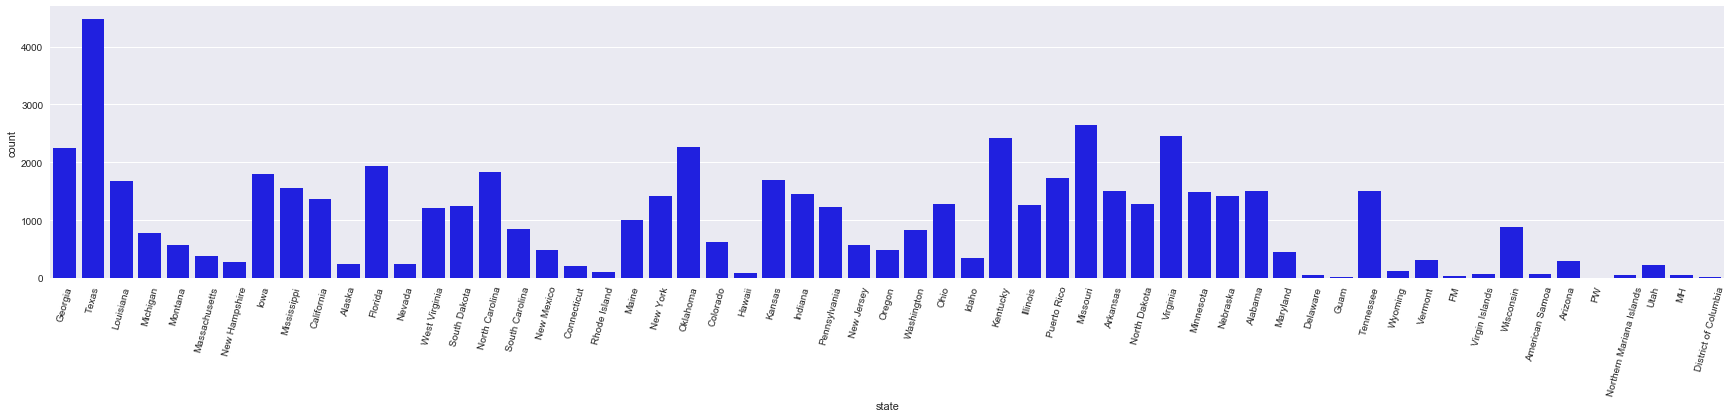

In [68]:
import seaborn as sns
plt.figure(figsize = (30,5))
plt.style.use('seaborn')
sns.countplot(disaster_df['state'], color = 'b')
plt.xticks(rotation = 75)

In [69]:
disaster_df.to_csv('./disaster_cleanp.csv', index = False)
df2 = pd.read_excel('./ststdsadata.xlsx',header=7)

In [70]:
df2.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Alabama,1976,1,2605000,1492409,57.3,1392154,53.4,100255,6.7
1,2,Alaska,1976,1,232000,159154,68.6,147809,63.7,11345,7.1


In [71]:
df2.columns 

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

### Rename columns data frame II

In [72]:
col ={ 'Unnamed: 0':'FIS_Code' , 'Unnamed: 1':'state', 'Unnamed: 2':'year', 'Unnamed: 3':'month', 'Unnamed: 4':'population',
       'Unnamed: 5':'labor_force_total', 'Unnamed: 6':'labor_force%', 'Unnamed: 7':'labor_force_employed', 'Unnamed: 8':'labor_force_employed%', 
       'Unnamed: 9':'labor_force_unemployed',
       'Unnamed: 10':'labor_force_unemployed%'}

In [73]:
df2.rename(columns=col , inplace = True)
df2.head(2)

,FIS_Code,state,year,month,population,labor_force_total,labor_force%,labor_force_employed,labor_force_employed%,labor_force_unemployed,labor_force_unemployed%
0,1,Alabama,1976,1,2605000,1492409,57.3,1392154,53.4,100255,6.7
1,2,Alaska,1976,1,232000,159154,68.6,147809,63.7,11345,7.1


In [74]:
df2.to_csv('./Employement_cleanp.csv', index = False)

### data frame III

In [75]:
from datetime import timedelta

In [76]:
df3 = pd.read_csv("./industry_cleanp.csv")
df3.head(2)

,occ_code,occ_title,tot_emp,h_mean,a_mean
0,00-0000,All Occupations,146875480,25.72,53490
1,11-0000,Management Occupations,8054120,58.88,122480


### Setting data frame based on standard occupational classication 

In [77]:
df3['job_industry']= df3['occ_code'].apply(lambda x : x[:2])
pd.set_option('display.max_row()',None)
ind = {'00':'occupation',
        '11' : 'Management',
        '13' : ' Business and Financial Operations',
        '15' : 'Computer and Mathematical',
        '17':'Architecture and Engineering',
        '19' :'Life, Physical, and Social Science',
        '21' :'Community and Social Service',
        '23' : 'Legal',
        '25' :'Educational Instruction and Library',
        '27' :'Arts, Design, Entertainment, Sports, and Media',
        '29' :'Healthcare Practitioners and Technical',
        '31' :'Healthcare Support',
        '33' :'Protective Service',
        '35' :'Food Preparation and Serving Related',
        '37' :'Building and Grounds Cleaning and Maintenance',
        '39' :'Personal Care and Service',
        '41' :'Sales and Related',
        '43' :'Office and Administrative Support',
        '45' :'Farming, Fishing, and Forestry',
        '47' :'Construction and Extraction',
        '49' :'Installation, Maintenance, and Repair',
        '51' :'Production',
        '53' :'Transportation and Material Moving'}
df3['job_industry'].replace(ind, inplace = True)
#df3['job_industry'] = df3['job_industry'].astype(str).map(lambda y: y.replace(ind)).astype(str)
df3.head(3)

,occ_code,occ_title,tot_emp,h_mean,a_mean,job_industry
0,00-0000,All Occupations,146875480,25.72,53490,occupation
1,11-0000,Management Occupations,8054120,58.88,122480,Management
2,11-1000,Top Executives,2658440,61.09,127070,Management


In [78]:
#f = {'*' : 58422}


In [79]:

df3['a_mean'] = df3['a_mean'].astype(str).map(lambda y: y.replace('*' ,'58525')).astype(int)
#[x for x in df3['a_mean'] if not '*' in x]
df3['a_mean'].mean()

61665.16177577126

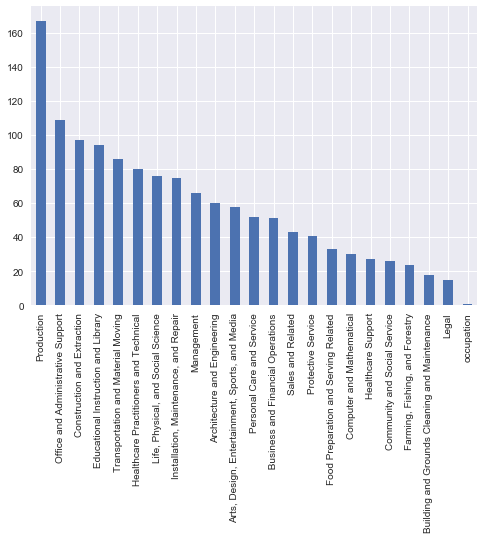

In [80]:
df3.job_industry.value_counts().plot(kind='bar')
plt.savefig('dfr')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

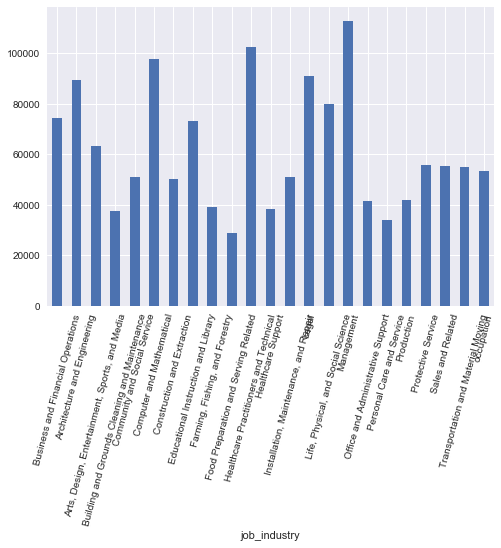

In [81]:
df3.groupby('job_industry').a_mean.mean().plot(kind = 'bar') 
plt.xticks(rotation = 75) 

In [82]:
#df['DATE']=pd.to_datetime(df['DATE'])
import datetime

In [83]:
disaster_df['Begin_date'] = pd.to_datetime(disaster_df['Begin_date'], format='%Y%m%d',infer_datetime_format=True)
disaster_df['Begin_date'].head(2)

0   1953-05-02 00:00:00+00:00
1   1953-05-15 00:00:00+00:00
Name: Begin_date, dtype: datetime64[ns, UTC]

In [84]:
disaster_df['month']=disaster_df['Begin_date'].apply(lambda x: x.month)
#df['month']=df['DATE'].apply(lambda x: x.month)
#df['day']=df['DATE'].apply(lambda x: x.day)
disaster_df.head(2)

,state,incidentType,title,Begin_date,Year_occured,End_date,month
0,Georgia,Tornado,TORNADO,1953-05-02 00:00:00+00:00,1953,1953-05-02T00:00:00.000Z,5
1,Texas,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15 00:00:00+00:00,1953,1953-05-15T00:00:00.000Z,5


months = {1:'January',2:'February', 3:'March', 4:'April',5:'May',6:'June',7:'July', 
          8:'August',
9:'September',10:'October',11:'November',12:'December'}
disaster_df['month'].replace(months, inplace = True)
disaster_df['month'].value_counts().sort_index().plot(kind='bar', color ='blue')

In [85]:
print(disaster_df['Begin_date'].max() -disaster_df['Begin_date'].min())
print(disaster_df['Begin_date'].min())

24452 days 05:59:00
1953-05-02 00:00:00+00:00


In [86]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [87]:
#plot_series(disaster_df, ['Year_occured'], title = 'Carbon Dioxide Output (generated)') 

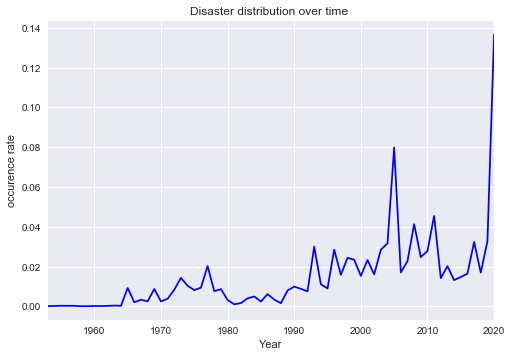

In [88]:
disaster_df['Year_occured'].value_counts(normalize = True).sort_index().plot(color='blue')
plt.xlabel('Year')
plt.ylabel('occurence rate')
plt.title('Disaster distribution over time ')
plt.savefig('dist')

In [89]:
df4= pd.read_excel('./state_occupations.xlsx') 

In [90]:
df4.shape

(36992, 25)

In [91]:
oc_df = df4[['STATE','OCC_CODE','OCC_TITLE','A_MEDIAN']].copy()
oc_df.head()

,STATE,OCC_CODE,OCC_TITLE,A_MEDIAN
0,Alabama,00-0000,All Occupations,32800
1,Alabama,11-0000,Management Occupations,96980
2,Alabama,11-1011,Chief Executives,196460
3,Alabama,11-1021,General and Operations Managers,102320
4,Alabama,11-1031,Legislators,18910


In [92]:
oc_df['JOB_CLASS']= oc_df['OCC_CODE'].apply(lambda x : x[:2])
pd.set_option('display.max_row()',None)
indi = {'00':'occupation',
        '11' :'Management',
        '13' :'Business and Financial Operations',
        '15' :'Computer and Mathematical',
        '17' :'Architecture and Engineering',
        '19' :'Life, Physical, and Social Science',
        '21' :'Community and Social Service',
        '23' :'Legal',
        '25' :'Educational Instruction and Library',
        '27' :'Arts, Design, Entertainment, Sports, and Media',
        '29' :'Healthcare Practitioners and Technical',
        '31' :'Healthcare Support',
        '33' :'Protective Service',
        '35' :'Food Preparation and Serving Related',
        '37' :'Building and Grounds Cleaning and Maintenance',
        '39' :'Personal Care and Service',
        '41' :'Sales and Related',
        '43' :'Office and Administrative Support',
        '45' :'Farming, Fishing, and Forestry',
        '47' :'Construction and Extraction',
        '49' :'Installation, Maintenance, and Repair',
        '51' :'Production',
        '53' :'Transportation and Material Moving'}
oc_df['JOB_CLASS'].replace(indi, inplace = True)

In [93]:
oc_df.head()

,STATE,OCC_CODE,OCC_TITLE,A_MEDIAN,JOB_CLASS
0,Alabama,00-0000,All Occupations,32800,occupation
1,Alabama,11-0000,Management Occupations,96980,Management
2,Alabama,11-1011,Chief Executives,196460,Management
3,Alabama,11-1021,General and Operations Managers,102320,Management
4,Alabama,11-1031,Legislators,18910,Management


In [94]:
df3['a_mean'] = df3['a_mean'].astype(str).map(lambda y: y.replace('*' ,'58525')).astype(int)
#[x for x in df3['a_mean'] if not '*' in x]
df3['a_mean'].mean()

61665.16177577126

In [95]:
def convert_data(val):
    #for i in val: 
        #if i in ["*","**","#"]:
        new_val=val.replace(["*","**","#"],49784)
        return new_val
oc_df['A_MEDIAN']= convert_data(oc_df['A_MEDIAN'])

In [96]:
#oc_df['A_MEDIAN'].astype(str).replace("*",0, inplace = True)

In [97]:
oc_df['A_MEDIAN'].mean()

51054.5570934256

 modeling

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression

In [99]:
df4 = pd.read_csv("./complete.csv")
df4.head(2)


,zipcode,tot_income,state,population,city,county,lat,lon
0,35004,290260,AL,10418,MOODY,St. Clair,33.603417,-86.493795
1,35005,121690,AL,7708,ADAMSVILLE,Jefferson,33.595950,-87.000649


In [102]:
business = {'tot_income': 'Distaer_rate'}
df4.rename( columns = business , inplace = True)

In [103]:
location = df4[['lat','lon']]

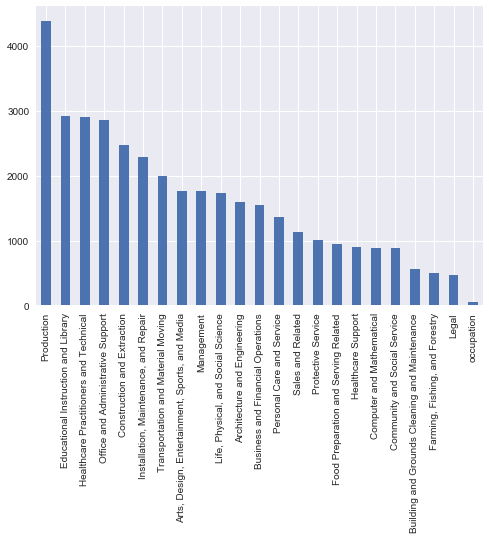

In [104]:
oc_df['JOB_CLASS'].value_counts().plot(kind='bar')

In [105]:
u = oc_df.groupby('JOB_CLASS')['A_MEDIAN'].mean()
m = pd.DataFrame(u)

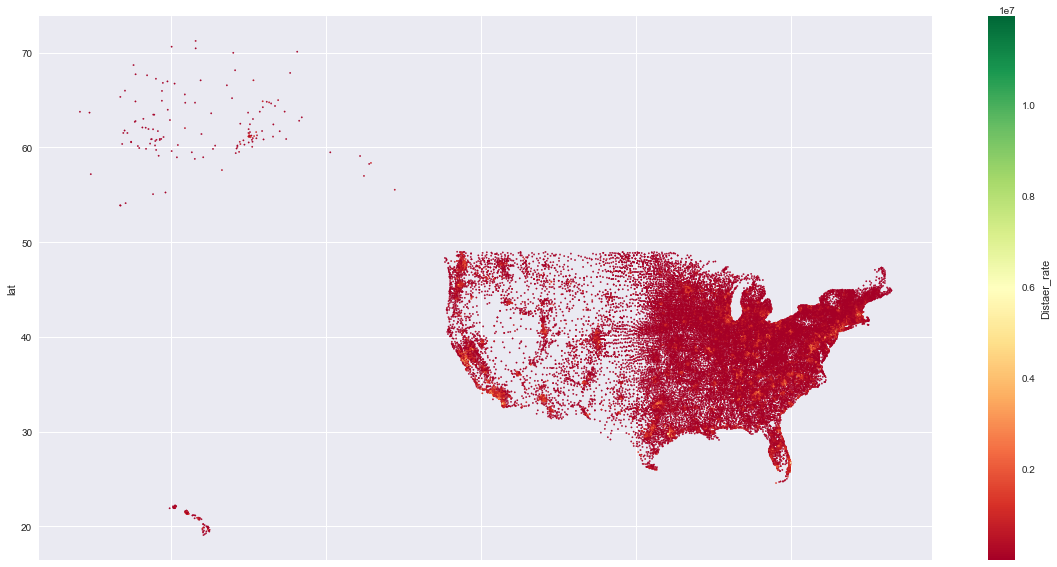

In [106]:
df4.plot(kind="scatter", x="lon", y="lat", c="Distaer_rate",
         cmap="RdYlGn", figsize=(20, 10), s=2);
plt.savefig('usa')

In [107]:
km = KMeans(n_clusters=20)
km.fit(location)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [108]:
xvars = bank.columns.str.startswith("var_")
X = bank.loc[:, xvars]
y = bank["target"]

NameError: name 'bank' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.5)

In [ ]:
model = LogisticRegression(penalty="none")
model.fit(X_train, y_train)